Import dependancies for news 

In [ ]:
!pip install newspaper3k
!pip install GoogleNews
!pip install gnewsclient


     |████████████████████████████████| 215kB 7.9MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
     |████████████████████████████████| 7.4MB 11.2MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13553 sha256=d95c721bb2a6cd94329ed0d3cdb2b7dff531556fa9086b71e11a3354a85fc82d
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398404 sha256=7665e11302d8f31b009293ca1d8e53d6b6fc5f87088db4f031494844d32be6df
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=465dd8553ad16dcc2669267e1c03cd07b92547e41505689a8c4968cbeaf53183
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7

**Extractive TEXT summarisation**

It is the traditional method developed first. The main objective is to identify the significant sentences of the text and add them to the summary. You need to note that the summary obtained contains exact sentences from the original text.

reference -> https://www.machinelearningplus.com/nlp/text-summarization-approaches-nlp-example/

This is the unsupervised text summarisation process ,which can be implemented by using multiple algorithms . We will be working with below algorithms on test data and evaluating their ROUGUE SCORE AND BLEU SCORE 

**1) TextRank**
**2) LexRank**
**3) Latent Semantic Analysis**
**4) Luhn**
**5) KL-Sum**

In [ ]:
!pip install gensim

In [ ]:
##Sample article 
from newspaper import Article
url ="https://www.news18.com/news/politics/govt-admin-public-all-dropped-guard-after-first-covid-19-wave-rss-chief-mohan-bhagwat-3741659.html"
article=Article(url)
article.download()
article.parse()
text=article.text
print(article.text)


After the first wave of COVID-19, the government, administration and public dropped their guard which led to the current situation, RSS chief Mohan Bhagwat said on Saturday and urged people to stay positive and proactive to fight the pandemic. Addressing a lecture series Positivity Unlimited’, Bhagwat said the country should stay united and work as a team in these testing times, instead of pointing fingers at each other.

“We are facing this situation because, whether it was the government, administration or public, everyone dropped their guard after the first wave despite indications from doctors, he said. Bhagwat said there is talk of a third wave. But, we will not be scared. We shall stand like a rock.

We have to stay positive and take precautions to keep ourselves COVID negative in the present situation, he said. The RSS chief said that this is not an appropriate time to point fingers and all should avoid making irrational remarks.

Citing England’s situation in World War II when 

In [ ]:
import gensim
from gensim.summarization import summarize

In [ ]:
# Passing the text corpus to summarizer 
short_summary = summarize(text,word_count=50)
print(short_summary)

After the first wave of COVID-19, the government, administration and public dropped their guard which led to the current situation, RSS chief Mohan Bhagwat said on Saturday and urged people to stay positive and proactive to fight the pandemic.


2**) LexRank**

In [ ]:
# Installing and Importing sumy
!pip install sumy
import sumy

     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 10.1MB 28.3MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21711 sha256=89eb23c17e5fac161f751d39a2c293f4ed9ee0611e29cc7943b9755f274db2a1
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=e78e57112faa493442675161035808b1d85b622363d19c5f0f23425df0ca2698
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built breadability pycountry


In [ ]:
# Importing the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [ ]:
# Import the LexRank summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Initializing the parser
my_parser = PlaintextParser.from_string(text,Tokenizer('english'))

In [ ]:
# Creating a summary of 3 sentences.
lex_rank_summarizer = LexRankSummarizer()

lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=3)

# Printing the summary
for sentence in lexrank_summary:
  print(sentence)

After the first wave of COVID-19, the government, administration and public dropped their guard which led to the current situation, RSS chief Mohan Bhagwat said on Saturday and urged people to stay positive and proactive to fight the pandemic.
Bhagwat said there is talk of a third wave.
We have to stay positive and take precautions to keep ourselves COVID negative in the present situation, he said.


3) **LSA summariser**

In [ ]:
from sumy.summarizers.lsa import LsaSummarizer

In [ ]:
# Parsing the text string using PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser=PlaintextParser.from_string(text,Tokenizer('english'))

In [ ]:
# creating the summarizer
lsa_summarizer=LsaSummarizer()
lsa_summary= lsa_summarizer(parser.document,3)

# Printing the summary
for sentence in lsa_summary:
    print(sentence)

The RSS chief said that this is not an appropriate time to point fingers and all should avoid making irrational remarks.
Citing England’s situation in World War II when everything seemed going against it, Bhagwat said a quote was written on the then prime minister Winston Churchill’s desk which read, “There is no pessimism in this office.
Similarly, he said, in this situation we can’t give up on courage.


**LUHN Summariser**

In [ ]:
# Import the summarizer
from sumy.summarizers.luhn import LuhnSummarizer

In [ ]:
# Creating the parser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser=PlaintextParser.from_string(text,Tokenizer('english'))

In [ ]:
#  Creating the summarizer
luhn_summarizer=LuhnSummarizer()
luhn_summary=luhn_summarizer(parser.document,sentences_count=3)

# Printing the summary
for sentence in luhn_summary:
  print(sentence)

After the first wave of COVID-19, the government, administration and public dropped their guard which led to the current situation, RSS chief Mohan Bhagwat said on Saturday and urged people to stay positive and proactive to fight the pandemic.
“We are facing this situation because, whether it was the government, administration or public, everyone dropped their guard after the first wave despite indications from doctors, he said.
The RSS chief said that this is not an appropriate time to point fingers and all should avoid making irrational remarks.


**5 KL Sum Summariser**

In [ ]:
from sumy.summarizers.kl import KLSummarizer

In [ ]:
# Creating the parser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser=PlaintextParser.from_string(text,Tokenizer('english'))

In [ ]:
# Instantiating the  KLSummarizer
kl_summarizer=KLSummarizer()
kl_summary=kl_summarizer(parser.document,sentences_count=3)

# Printing the summary
for sentence in kl_summary:
    print(sentence)

After the first wave of COVID-19, the government, administration and public dropped their guard which led to the current situation, RSS chief Mohan Bhagwat said on Saturday and urged people to stay positive and proactive to fight the pandemic.
Bhagwat said there is talk of a third wave.
They don’t exist".


**Abstractive Text Summarisation**

Exploring via huggingface transformers library , it contains various trained models that can be useful in analysis of optimum text summarisation algorithm that can be used .
HuggingFace supports state of the art models to implement tasks such as summarization, classification, etc.. Some common models are GPT-2, GPT-3, BERT , OpenAI, GPT, T5.

In [ ]:
!pip install transformers==2.9.0 
!pip install pytorch_lightning==0.7.5

     |████████████████████████████████| 645kB 8.3MB/s 
     |████████████████████████████████| 901kB 17.0MB/s 
     |████████████████████████████████| 5.6MB 35.3MB/s 
     |████████████████████████████████| 1.2MB 32.3MB/s 
     |████████████████████████████████| 235kB 8.5MB/s 
     |████████████████████████████████| 829kB 39.0MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=b802fce4b4bf79bb17962b1db22116bcdeb75d41532b0c681988589db29e3013
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [ ]:
# Importing requirements
from transformers import T5Tokenizer, T5Config, T5ForConditionalGeneration

In [ ]:
# Instantiating the model and tokenizer 
my_model = T5ForConditionalGeneration.from_pretrained('t5-small')
#my_model.prepare_inputs_for_generation
#print(str(my_model))
tokenizer = T5Tokenizer.from_pretrained('t5-small')
#print(str(tokenizer))

In [ ]:
# Concatenating the word "summarize:" to raw text
text2 = "summarize:" + text
#print(text2)
# encoding the input text
input_ids=tokenizer.encode(text2, return_tensors='pt')
# Generating summary ids
summary_ids = my_model.generate(input_ids)
summary_ids



tensor([[    0, 14348,  5752,  1290,  2618, 16332,     9,   122,   210,   144,
           243,     8,   684,   225,  1049, 18279,    11,   161,    38,     3]])

In [ ]:
# Decoding the tensor and printing the summary.
t5_summary = tokenizer.decode(summary_ids[0])
print(t5_summary)

RSS chief Mohan Bhagwat said the country should stay united and work as 


In [ ]:
# Importing the model
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig

In [ ]:
# Loading the model and tokenizer for bart-large-cnn

tokenizer=BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model=BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

In [ ]:
# Encoding the inputs and passing them to model.generate()
inputs = tokenizer.batch_encode_plus([text],return_tensors='pt')
summary_ids = model.generate(inputs['input_ids'], early_stopping=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [ ]:
# Decoding and printing the summary
bart_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(bart_summary)

RSS chief Mohan Bhagwat urged people to stay positive and proactive to fight the pandemic. He said the country should stay united and work as a team in these testing times, instead of pointing fingers at each other. The RSS chief said there is talk of a third wave. But, we will not be scared. We shall stand like a rock.


In [ ]:
# Importing model and tokenizer
from transformers import GPT2Tokenizer,GPT2LMHeadModel

# Instantiating the model and tokenizer with gpt-2
tokenizer=GPT2Tokenizer.from_pretrained('gpt2')
model=GPT2LMHeadModel.from_pretrained('gpt2')

# Encoding text to get input ids & pass them to model.generate()
inputs=tokenizer.batch_encode_plus([text],return_tensors='pt')
summary_ids=model.generate(inputs['input_ids'],early_stopping=True)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [ ]:
# Decoding and printing summary

GPT_summary=tokenizer.decode(summary_ids[0],skip_special_tokens=True)
print(GPT_summary)

After the first wave of COVID-19, the government, administration and public dropped their guard which led to the current situation, RSS chief Mohan Bhagwat said on Saturday and urged people to stay positive and proactive to fight the pandemic. Addressing a lecture series Positivity Unlimited’, Bhagwat said the country should stay united and work as a team in these testing times, instead of pointing fingers at each other.

“We are facing this situation because, whether it was the government, administration or public, everyone dropped their guard after the first wave despite indications from doctors, he said. Bhagwat said there is talk of a third wave. But, we will not be scared. We shall stand like a rock.

We have to stay positive and take precautions to keep ourselves COVID negative in the present situation, he said. The RSS chief said that this is not an appropriate time to point fingers and all should avoid making irrational remarks.

Citing England’s situation in World War II when 

In [ ]:
!pip install rouge/requirements.txt
!pip install rouge-score

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [ ]:
!pip3 install rogue

  Created wheel for rogue: filename=rogue-0.0.2-cp37-none-any.whl size=7231 sha256=b164781ee343c75f5347f1702268fe7a77934e06578eb03ccb91017f9ae173a9
  Stored in directory: /root/.cache/pip/wheels/02/39/20/d62d788c77e226459e17e14df0d04aa5e48ef87d1e05cd06e5
Successfully built rogue


In [ ]:
!git clone https://github.com/pltrdy/rouge
!cd rouge
!python3.7 rouge/setup.py install
!pip uninstall rouge

fatal: destination path 'rouge' already exists and is not an empty directory.
running install
running bdist_egg
running egg_info
writing rouge.egg-info/PKG-INFO
writing dependency_links to rouge.egg-info/dependency_links.txt
writing entry points to rouge.egg-info/entry_points.txt
writing requirements to rouge.egg-info/requires.txt
writing top-level names to rouge.egg-info/top_level.txt
reading manifest file 'rouge.egg-info/SOURCES.txt'
writing manifest file 'rouge.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying rouge.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying rouge.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying rouge.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying rouge.egg-info/entry_points.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying rouge.egg-info/requires.

In [ ]:
!pip install executor

     |████████████████████████████████| 92kB 4.5MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 


In [ ]:
from rouge_score import rouge_scorer

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score('The quick brown fox jumps over the lazy dog',
                      'The quick brown dog jumps on the log.')

In [ ]:
print(str(scores))

{'rouge1': Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765), 'rougeL': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471)}


In [ ]:
!pip3 install python-csv

     |████████████████████████████████| 133kB 15.6MB/s 
     |████████████████████████████████| 163kB 36.3MB/s 
     |████████████████████████████████| 911kB 38.9MB/s 
  Created wheel for python-csv: filename=python_csv-0.0.13-cp37-none-any.whl size=34813 sha256=ef6a0e6f641bacb4f0e00a8279068c86a8baa4bbf92e213bdf2560c6910508c1
  Stored in directory: /root/.cache/pip/wheels/2a/17/81/2360123e1e963e6533dc6503b0e7194c14edd263baefec1c59
  Created wheel for demjson: filename=demjson-2.2.4-cp37-none-any.whl size=73566 sha256=24cddf1df3c6df955a8394a453da6d7a58ff3fec28cd95455d4a68ff7892c1a4
  Stored in directory: /root/.cache/pip/wheels/c5/d2/ab/a54fb5ea53ac3badba098160e8452fa126a51febda80440ded
  Created wheel for leven: filename=leven-1.0.4-cp37-cp37m-linux_x86_64.whl size=55486 sha256=2daa6a7902c74eda3df0c8af7e3a42ab06663b904f34957fe3f1cc196a2d8389
  Stored in directory: /root/.cache/pip/wheels/54/64/a5/439db671d666a50f3b3cebd2dcab3fbbab02785adf58e47552
  Created wheel for jtutils: filename=j

##CREATION OF DATASET AND CUSTOM MODEL IMPLEMENTATION## 
1) BBC politics news dataset , classified as folders 
2) read the news and summary and store in a csv file
3) read The csv and store data in pandas dataframe
4) clean the data 

In [ ]:
import csv 
import os

In [ ]:

print(str(os.listdir()))
# List all files in a directory using os.listdir
newspath = '/content/PoliticsNews'
summarypath='/content/PoliticsNewsSummary'
newsList=[]
summaryList=[]

'''for entry in os.listdir(newspath):
    if os.path.isfile(os.path.join(newspath, entry)):
        #print(entry)
        filename=os.path.join(newspath, entry)
        with open(filename) as f: 
         newsList.append(f.read())
for entry in os.listdir(summarypath):
    if os.path.isfile(os.path.join(summarypath, entry)):
        #print(entry)
        filename=os.path.join(summarypath, entry)
        with open(filename) as f: 
         summaryList.append(f.read())
print(str(len(newsList)))
print(str(len(summaryList)))'''

['.config', '.ipynb_checkpoints', 'summary-dataset.csv', 'PoliticsNews', 'sample_data']


'for entry in os.listdir(newspath):\n    if os.path.isfile(os.path.join(newspath, entry)):\n        #print(entry)\n        filename=os.path.join(newspath, entry)\n        with open(filename) as f: \n         newsList.append(f.read())\nfor entry in os.listdir(summarypath):\n    if os.path.isfile(os.path.join(summarypath, entry)):\n        #print(entry)\n        filename=os.path.join(summarypath, entry)\n        with open(filename) as f: \n         summaryList.append(f.read())\nprint(str(len(newsList)))\nprint(str(len(summaryList)))'

In [ ]:

with open('/content/summary-dataset.csv', mode='w') as dataset:
    employee_writer = csv.writer(dataset, delimiter='$', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    employee_writer.writerow(['ID','NEWS','SUMMARY'])
    count=1;
    for j in range(len(newsList)):
     employee_writer.writerow([str(count),str(newsList[j]).replace("\n"," "),str(summaryList[j]).replace("\n"," ")])
     count+=1
     

In [ ]:
import pandas as pd

data=pd.read_csv("/content/summary-dataset.csv",delimiter="$")
data.head()


,ID,NEWS,SUMMARY
0,1,Job cuts 'false economy' - TUC Plans to shed...,"Plans to shed 71,000 civil service jobs will p..."
1,2,Probe launched on Ken Nazi jibe An investigat...,Ms Gavron said she thought Mr Livingstone's co...
2,3,Blair blasts Tory spending plans Tony Blair h...,"In his speech, Mr Blair contrasted a reformed ..."
3,4,Iraq advice claim sparks new row The Tories s...,"""After that Downing Street proceeded to set ou..."
4,5,Women MPs reveal sexist taunts Women MPs endu...,But she said there was a difference between th...


In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [ ]:
# Clean the summaries and texts
clean_summaries = []
for summary in data.SUMMARY:
    clean_summaries.append(clean_text(summary, remove_stopwords=False))
print("Summaries are complete.")

clean_texts = []
for text in data.NEWS:
    clean_texts.append(clean_text(text))
print("Texts are complete.")

Summaries are complete.
Texts are complete.


In [ ]:
data['NEWS']=data['NEWS'].apply(lambda x:clean_text(x,remove_stopwords=False))
data['SUMMARY']=data['SUMMARY'].apply(lambda x:clean_text(x,remove_stopwords=False))
data['WORD_COUNT_SUMMARY']=data['SUMMARY'].apply(lambda x:len(str(x).split()))
data['WORD_COUNT_TEXT']=data['NEWS'].apply(lambda x:len(str(x).split()))
data.head()

,ID,NEWS,SUMMARY,WORD_COUNT_SUMMARY,WORD_COUNT_TEXT
0,1,job cuts false economy tuc plans to shed 7...,plans to shed 71 000 civil service jobs will p...,112,261
1,2,probe launched on ken nazi jibe an investigati...,ms gavron said she thought mr livingstone s co...,140,343
2,3,blair blasts tory spending plans tony blair ha...,in his speech mr blair contrasted a reformed ...,259,582
3,4,iraq advice claim sparks new row the tories sa...,after that downing street proceeded to set ou...,256,618
4,5,women mps reveal sexist taunts women mps endur...,but she said there was a difference between th...,271,543


In [ ]:
# Inspect the cleaned summaries and texts to ensure they have been cleaned well
for i in range(5):
    print("Clean Review #",i+1)
    print(clean_summaries[i])
    print(clean_texts[i])
    print()

Clean Review # 1
plans to shed 71 000 civil service jobs will prove to be a  false economy  that could hamper public sector reforms  according to a tuc report  public services are improving but looking for simple savings through job cuts at this stage could be a false economy  they may shoot a tory fox  but cutting thousands of civil service jobs will hit the morale and capabilities of the public servants expected to implement government reforms public and commercial services union members have already voted to strike over cuts for one day on 5 november general secretary brendan barber warned the  costs could easily outweigh the benefits  the costs could easily outweigh the benefits  
job cuts false economy tuc plans shed 71 000 civil service jobs prove false economy could hamper public sector reforms according tuc report public commercial services union members already voted strike cuts one day 5 november tuc said cuts would deliver less 6 £22bn ministers hope save efficiency reforms 

In [ ]:
def count_words(count_dict, text):
    '''Count the number of occurrences of each word in a set of text'''
    for sentence in text:
        for word in sentence.split():
            if word not in count_dict:
                count_dict[word] = 1
            else:
                count_dict[word] += 1

In [ ]:
# Find the number of times each word was used and the size of the vocabulary
word_counts = {}

count_words(word_counts, clean_summaries)
count_words(word_counts, clean_texts)
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 11306


In [ ]:
import numpy as np


def printPercentilevalues(dataframe,start,end,jump):
 for i in range(start,end,jump):
   var=dataframe.values
   var=np.sort(var,axis=None)
   print("{} Percentile is {}".format(i,var[int(len(var)*float(i)/100)]))


In [ ]:
print("PERCENTILE OF NEWS LENGTH")
printPercentilevalues(data['WORD_COUNT_TEXT'],0,100,10)
print("PERCENTILE OF SUMMARY LENGTH")
printPercentilevalues(data['WORD_COUNT_SUMMARY'],0,100,10)
print("90-100/PERCENTILE OF NEWS LENGTH")
printPercentilevalues(data['WORD_COUNT_TEXT'],90,100,1)
print("90-100/PERCENTILE OF SUMMARY LENGTH")
printPercentilevalues(data['WORD_COUNT_SUMMARY'],90,100,1)



PERCENTILE OF NEWS LENGTH
0 Percentile is 91
10 Percentile is 253
20 Percentile is 295
30 Percentile is 350
40 Percentile is 406
50 Percentile is 450
60 Percentile is 491
70 Percentile is 518
80 Percentile is 567
90 Percentile is 621
PERCENTILE OF SUMMARY LENGTH
0 Percentile is 40
10 Percentile is 106
20 Percentile is 129
30 Percentile is 151
40 Percentile is 178
50 Percentile is 197
60 Percentile is 211
70 Percentile is 231
80 Percentile is 255
90 Percentile is 289
90-100/PERCENTILE OF NEWS LENGTH
90 Percentile is 621
91 Percentile is 625
92 Percentile is 636
93 Percentile is 647
94 Percentile is 675
95 Percentile is 696
96 Percentile is 718
97 Percentile is 767
98 Percentile is 868
99 Percentile is 985
90-100/PERCENTILE OF SUMMARY LENGTH
90 Percentile is 289
91 Percentile is 290
92 Percentile is 295
93 Percentile is 301
94 Percentile is 307
95 Percentile is 320
96 Percentile is 333
97 Percentile is 339
98 Percentile is 400
99 Percentile is 453


In [ ]:
import matplotlib.pyplot as plt

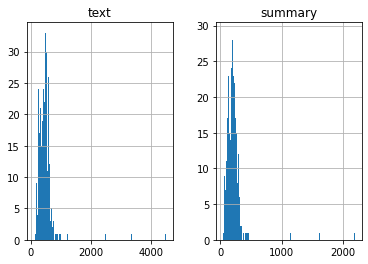

In [ ]:
## PLOT HISTOGRAMS OF TEXT AND SUMMARY DISTRIBUTIONS
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['NEWS']:
      text_word_count.append(len(i.split()))

for i in data['SUMMARY']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins=200)
plt.show()

In [ ]:

def boxPlotFromSeriesObject(series,title):

 series.plot.box(title=title, xticks=[]);
 print(series.describe());
 plt.xlabel('Summary statistics through box and whisker');
 plt.show(block=True);

count     417.000000
mean      461.417266
std       305.009392
min        91.000000
25%       321.000000
50%       450.000000
75%       535.000000
max      4489.000000
Name: WORD_COUNT_TEXT, dtype: float64


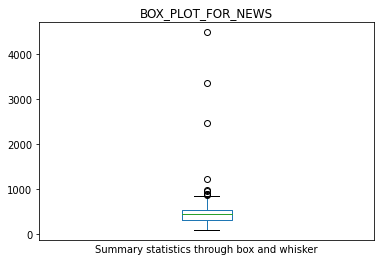

count     417.000000
mean      206.438849
std       148.005430
min        40.000000
25%       140.000000
50%       197.000000
75%       243.000000
max      2197.000000
Name: WORD_COUNT_SUMMARY, dtype: float64


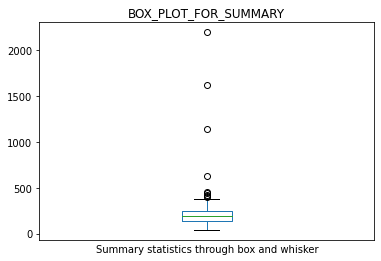

In [ ]:
boxPlotFromSeriesObject(data['WORD_COUNT_TEXT'],"BOX_PLOT_FOR_NEWS")
boxPlotFromSeriesObject(data['WORD_COUNT_SUMMARY'],"BOX_PLOT_FOR_SUMMARY")


In [ ]:
max_length_summary=206
max_length_news=500


In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['NEWS'],data['SUMMARY'],test_size=0.1,random_state=0,shuffle=True)

In [ ]:
#prepare a tokenizer for reviews on training data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
def getTokenisedAndPaddedValuesForTrainingData(tr,val,maxlength):
  x_tokenizer = Tokenizer()
  x_tokenizer.fit_on_texts(list(tr))

#convert text sequences into integer sequences
  tr    =   x_tokenizer.texts_to_sequences(tr) 
  val   =   x_tokenizer.texts_to_sequences(val)

#padding zero upto maximum length
  tr    =   pad_sequences(tr,  maxlen=maxlength, padding='post') 
  val   =   pad_sequences(val, maxlen=maxlength, padding='post')

  x_voc_size   =  len(x_tokenizer.word_index) +1
  return tr,val,x_voc_size


In [ ]:
def getTokeniserAndPaddedValuesForTrainingData(tr,val,maxlength):
  x_tokenizer = Tokenizer()
  x_tokenizer.fit_on_texts(list(tr))

#convert text sequences into integer sequences
  tr    =   x_tokenizer.texts_to_sequences(tr) 
  val   =   x_tokenizer.texts_to_sequences(val)

#padding zero upto maximum length
  tr    =   pad_sequences(tr,  maxlen=maxlength, padding='post') 
  val   =   pad_sequences(val, maxlen=maxlength, padding='post')

  x_voc_size   =  len(x_tokenizer.word_index) +1
  return tr,val,x_voc_size,x_tokenizer

In [ ]:
#Loading our Glove Model 
embeddings_index = dict()
f = open('/content/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

#Calculating Percentage of words from train text present in Word2vec model
words_source_train = []
for i in data["NEWS"] :
  words_source_train.extend(i.split(' '))
## Find the total number of words in the Train data of Essays.
print("all the words in the corpus", len(words_source_train))
## Find the unique words in this set of words
words_source_train = set(words_source_train)
print("the unique words in the corpus", len(words_source_train))
## Find the words present in both Glove Vectors as well as our corpus.
inter_words = set(embeddings_index.keys()).intersection(words_source_train)
print("The number of words that are present in both glove vectors and our corpus are {} which \
is nearly {}% ".format(len(inter_words), np.round((float(len(inter_words))/len(words_source_train))
*100)))
words_corpus_source_train = {}
words_glove = set(embeddings_index.keys())
for i in words_source_train:
  if i in words_glove:
    words_corpus_source_train[i] = embeddings_index[i]
print("word 2 vec length", len(words_corpus_source_train))

Loaded 81788 word vectors.
all the words in the corpus 217493
the unique words in the corpus 11311
The number of words that are present in both glove vectors and our corpus are 10482 which is nearly 93.0% 
word 2 vec length 10482


In [ ]:
x_tr,x_val,x_voc_size,x_tokenizer=getTokeniserAndPaddedValuesForTrainingData(x_tr,x_val,max_length_news)
word_index = x_tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix.shape)

(10773, 100)


In [ ]:
x_tr,x_val,x_voc_size=getTokenisedAndPaddedValuesForTrainingData(x_tr,x_val,max_length_summary)
y_tr,y_val,y_voc_size=getTokenisedAndPaddedValuesForTrainingData(y_tr,y_val,max_length_summary)


In [ ]:
print(str(x_tr.shape))
print(str(y_val.shape))

(375, 206)
(42, 206)


In [ ]:
!git clone https://github.com/chen0040/keras-text-summarization.git

Cloning into 'keras-text-summarization'...
remote: Enumerating objects: 552, done.
remote: Total 552 (delta 0), reused 0 (delta 0), pack-reused 552
Receiving objects: 100% (552/552), 312.25 MiB | 29.52 MiB/s, done.
Resolving deltas: 100% (330/330), done.


In [ ]:
!pip3 install rogue
!pip install rouge-score

/content/keras-text-summarization
loading csv file ...
extract configuration from input texts ...


/content/keras-text-summarization/keras_text_summarization/library/seq2seq.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(temp)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


(333,)
(84,)
(333, 500)
(84, 500)
Epoch 1/100
5/5 [==============================] - 55s 5s/step - loss: 11.3257 - accuracy: 0.0131 - val_loss: 11.5405 - val_accuracy: 0.0170
Epoch 2/100
5/5 [==============================] - 21s 4s/step - loss: 12.2091 - accuracy: 0.0169 - val_loss: 12.1072 - val_accuracy: 0.0195
Epoch 3/100
5/5 [==============================] - 22s 4s/step - loss: 12.2843 - accuracy: 0.0174 - val_loss: 11.5994 - val_accuracy: 0.0190
Epoch 4/100
5/5 [==============================] - 21s 4s/step - loss: 11.7238 - accuracy: 0.0173 - val_loss: 11.9127 - val_accuracy: 0.0199
Epoch 5/100
5/5 [==============================] - 24s 5s/step - loss: 11.9835 - accuracy: 0.0187 - val_loss: 11.2659 - val_accuracy: 0.0178
Epoch 6/100
5/5 [==============================] - 21s 4s/step - loss: 11.1603 - accuracy: 0.0166 - val_loss: 10.5007 - val_accuracy: 0.0157
Epoch 7/100
5/5 [==============================] - 21s 4s/step - loss: 10.7403 - accuracy: 0.0156 - val_loss: 11.1744 - 

KeyError: ignored

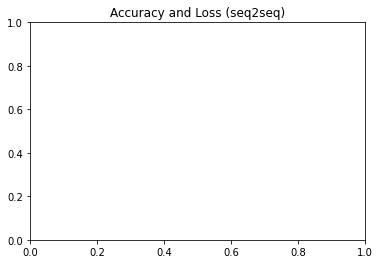

In [ ]:
%cd /content/keras-text-summarization
from __future__ import print_function

import pandas as pd
from sklearn.model_selection import train_test_split
from keras_text_summarization.library.utility.plot_utils import plot_and_save_history
from keras_text_summarization.library.seq2seq import Seq2SeqSummarizer
from keras_text_summarization.library.applications.fake_news_loader import fit_text
import numpy as np

LOAD_EXISTING_WEIGHTS = True

np.random.seed(42)
data_dir_path = '/content' # refers to the demo/data folder
model_dir_path = '/content/keras-text-summarization/demo/models/' # refers to the demo/models folder
report_dir_path = './content'


print('loading csv file ...')
df = pd.read_csv(data_dir_path + "/summary-dataset.csv",error_bad_lines=False,delimiter="$")

print('extract configuration from input texts ...')
X = df['NEWS']
Y = df['SUMMARY']


config = fit_text(X, Y,target_seq_max_length=206)

summarizer = Seq2SeqSummarizer(config)

if LOAD_EXISTING_WEIGHTS:
    summarizer.load_weights(weight_file_path=Seq2SeqSummarizer.get_weight_file_path(model_dir_path=model_dir_path))

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

history = summarizer.fit(Xtrain, Ytrain, Xtest, Ytest, epochs=100,model_dir_path=model_dir_path)

history_plot_file_path = report_dir_path + '/' + Seq2SeqSummarizer.model_name + '-history.png'
if LOAD_EXISTING_WEIGHTS:
    history_plot_file_path = report_dir_path + '/' + Seq2SeqSummarizer.model_name + '-history-v' + str(summarizer.version) + '.png'
plot_and_save_history(history, summarizer.model_name, history_plot_file_path, metrics={'loss', 'acc'})




In [ ]:
%cd /content/keras-text-summarization
from __future__ import print_function
from rouge_score import rouge_scorer
import pandas as pd
from keras_text_summarization.library.seq2seq import Seq2SeqSummarizer
import numpy as np

np.random.seed(42)
data_dir_path = '/content' # refers to the demo/data folder
model_dir_path = '/content/keras-text-summarization/demo/models/' # refers to the demo/models folder

print('loading csv file ...')
df = pd.read_csv(data_dir_path + "/summary-dataset.csv",error_bad_lines=False,delimiter="$")
df.head()
X = df['NEWS']
Y = df['SUMMARY']

config = np.load(Seq2SeqSummarizer.get_config_file_path(model_dir_path=model_dir_path),allow_pickle=True).item()

summarizer = Seq2SeqSummarizer(config)
summarizer.load_weights(weight_file_path=Seq2SeqSummarizer.get_weight_file_path(model_dir_path=model_dir_path))

print('start predicting ...')
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

for i in range(20):
    x = X[i]
    actual_headline = Y[i]
    headline = summarizer.summarize(x)
    print('Article: ', x)
    print('Generated Headline: ', headline)
    print('Original Headline: ', actual_headline)
    scores = scorer.score(actual_headline,
                      headline)
    
    print(str(scores))
    print("####################")


/content/keras-text-summarization
loading csv file ...
start predicting ...
Article:  Job cuts 'false economy'  - TUC  Plans to shed 71,000 civil service jobs will prove to be a "false economy" that could hamper public sector reforms, according to a TUC report.  Public and Commercial Services union members have already voted to strike over cuts for one day on 5 November. The TUC said cuts would deliver less than 6% of the £22bn ministers hope to save through efficiency reforms. General secretary Brendan Barber warned the "costs could easily outweigh the benefits". "The government's big boost to public spending is now showing results," said Mr Barber. "Public services are improving but looking for simple savings through job cuts at this stage could be a false economy.  "They may shoot a Tory fox, but cutting thousands of civil service jobs will hit the morale and capabilities of the public servants expected to implement government reforms. The costs could easily outweigh the benefits." 

In [ ]:
!pwd


/content
